In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [79]:
df= pd.read_csv("WalmartDataSet.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [80]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [88]:
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [90]:
df.Store.value_counts()

Store
1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: count, dtype: int64

In [91]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [92]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [93]:
df.duplicated().sum()

0

In [94]:
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

866808.5549999999


In [95]:
outlier_threshold = 1.5 * IQR

df_trimmed = df[(df['Weekly_Sales'] >= Q1 - outlier_threshold) & (df['Weekly_Sales'] <= Q3 + outlier_threshold)]

In [96]:
print(df.shape)
print(df_trimmed.shape)

(6435, 8)
(6401, 8)


In [97]:
df.Store.value_counts()

Store
1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: count, dtype: int64

## <span style="color:orange; font-family:bold"> Observations:
- We have equal data for all stores.
- There are no NaN/Null Values.
- There are no duplicate values.
- There does not seem to be a lot of outliers but removing the outliers might impact sales forecast as it will delete random data from time series.

# <span style="color:lime"> EDA

In [99]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,6435.0,23.0,1.0,12.0,23.0,34.0,45.0,12.988182
Date,6435,2011-06-17 00:00:00,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
Weekly_Sales,6435.0,1046964.877562,209986.25,553350.105,960746.04,1420158.66,3818686.45,564366.622054
Holiday_Flag,6435.0,0.06993,0.0,0.0,0.0,0.0,1.0,0.255049
Temperature,6435.0,60.663782,-2.06,47.46,62.67,74.94,100.14,18.444933
Fuel_Price,6435.0,3.358607,2.472,2.933,3.445,3.735,4.468,0.45902
CPI,6435.0,171.578394,126.064,131.735,182.616521,212.743293,227.232807,39.356712
Unemployment,6435.0,7.999151,3.879,6.891,7.874,8.622,14.313,1.875885


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [101]:
## Range of Data
print(f"Minimum date in dataset is - {df['Date'].min()}")
print(f"Maximum date in dataset is - {df['Date'].max()}")

Minimum date in dataset is - 2010-02-05 00:00:00
Maximum date in dataset is - 2012-10-26 00:00:00


In [103]:
## Split date, month and year
df['Year'] =df['Date'].dt.year
df['Month'] =df['Date'].dt.month
df['Week'] =df['Date'].dt.weekday

In [104]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,4
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,4
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,4
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,4


In [105]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,4
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,4
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,4
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,4
6434,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667,2012,10,4


#### <span style="color:magenta">1>a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

Text(0.5, 0, 'Unemployment')

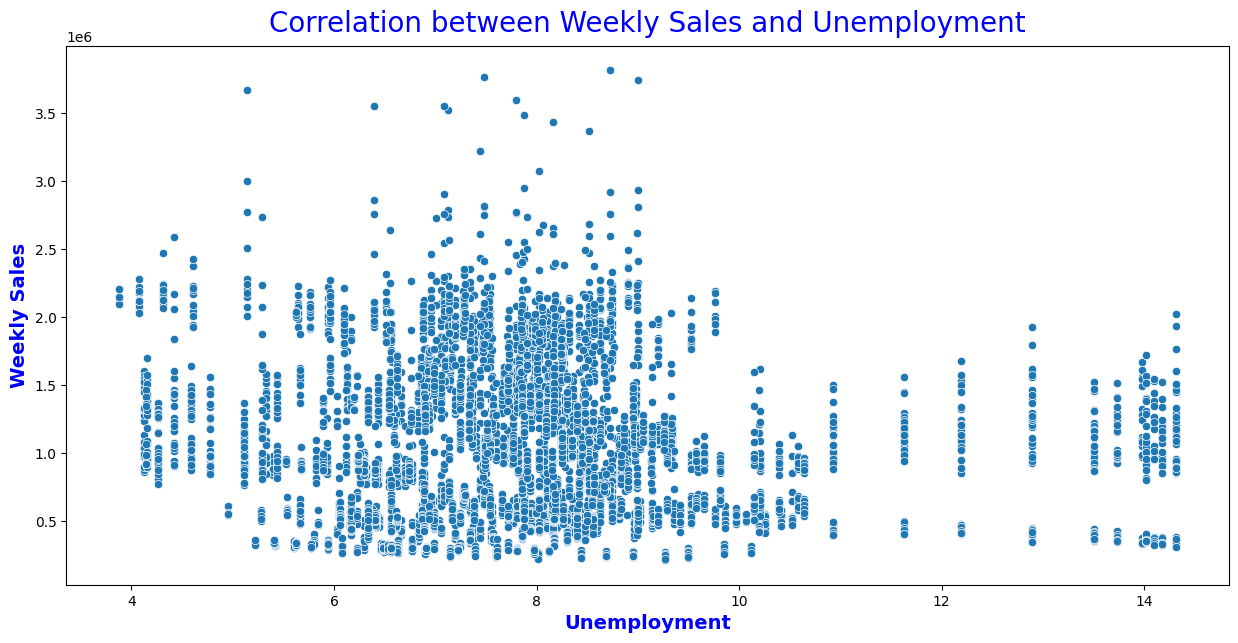

In [119]:
plt.figure(figsize=(15,7))
# sns.scatterplot(x="Weekly_Sales", y="Unemployment", data=df, hue="Store")
sns.scatterplot(x="Unemployment", y="Weekly_Sales", data=df)

plt.title('Correlation between Weekly Sales and Unemployment', color='blue', fontsize=20, pad=10)

plt.ylabel('Weekly Sales', color='blue',  fontweight='bold', fontsize=14)
plt.xlabel('Unemployment', color='blue',  fontweight='bold', fontsize=14)


##  <span style="color:orange; font-family:bold"> Observations from the Scatterplot:
-   High unemployment rate (10-14+ %) have seen less weekly sales volume.
-   For low and medium unemployment rate(4-9) we have comparitively higher weekly sales.

In [121]:
## Let's check the correlation between weekly sales and unemployment rate
corr= df["Weekly_Sales"].corr(df["Unemployment"])
print("Correlation Coefficient b/w  weekly sales and unemployment - ", corr)

Correlation Coefficient b/w  weekly sales and unemployment -  -0.10617608965795416


## <span style="color:orange; font-family:bold"> Observations
-  The correlation coefficient of -0.106 suggests a weak negative correlation between weekly sales and unemployment.

In [124]:
## Let's check which stores are suffering the most due to unemployment i.e which have highest negative corr.
stores_corr = df.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr().unstack()

In [130]:
top_5= stores_corr['Weekly_Sales']['Unemployment'].sort_values()[:5]
top_5

Store
38   -0.785290
44   -0.780076
39   -0.384681
42   -0.356355
41   -0.350630
Name: Unemployment, dtype: float64

In [132]:
print("Top 5 stores impacted by unemployment are - \n", *top_5.index)

Top 5 stores impacted by unemployment are - 
 38 44 39 42 41


#### <span style="color:magenta">1>b. If the weekly sales show a seasonal trend, when and what could be the reason?

In [133]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,4
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,4
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,4
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,4


In [134]:
df.Date.value_counts()

Date
2010-02-05    45
2011-12-23    45
2011-11-11    45
2011-11-18    45
2011-11-25    45
              ..
2011-01-07    45
2011-01-14    45
2011-01-21    45
2011-01-28    45
2012-10-26    45
Name: count, Length: 143, dtype: int64

In [136]:
# First lets check for sum of sales. Though this will not be appropriate since each store's seasonality may vary.

df_total_time_series= df.groupby('Date')[["Weekly_Sales"]].sum()

In [137]:
df_total_time_series.head()

,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30


<Axes: xlabel='Date'>

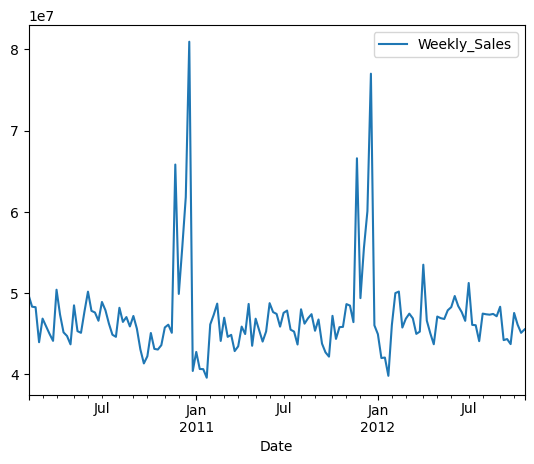

In [138]:
df_total_time_series.plot()

## <span style="color:orange; font-family:bold"> Observations
-   Looking at the graph it does seems like there is seasonality over a year i.e 12 months
-   Sales are higher during Winters.
-   Assuming the reasons for this seasonality:
        
        ->   People might not want to wander outside much during winters so they buy more in some months so they don;t have to go out again and again. Compare to buying in Summer, products might get affescted by temp so people go to buy stuff only when needed.
       
        ->  Main selling product might be the one that has higher sale in Winters like Jackets(warm clothes), Hot Beverages etc.
       
        ->  Months like Oct, Nov, Dec, Jan mark festival season like Dussehra, Diwali(Specific to India), Christmas, New Year Eve which may cause sudden incresase in sales for Walmart.